In [3]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from collections import defaultdict
from scipy.stats.stats import pearsonr

In [4]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [5]:
df = pd.read_csv('training.csv')

In [6]:
df['MMRAcquisitionAuctionAveragePrice'].fillna(df['MMRAcquisitionAuctionAveragePrice'].median(), inplace = True)
df['MMRAcquisitionAuctionCleanPrice'].fillna(df['MMRAcquisitionAuctionCleanPrice'].median(), inplace = True)
df['MMRAcquisitionRetailAveragePrice'].fillna(df['MMRAcquisitionRetailAveragePrice'].median(), inplace = True)
df['MMRAcquisitonRetailCleanPrice'].fillna(df['MMRAcquisitonRetailCleanPrice'].median(), inplace = True)
df['MMRCurrentAuctionAveragePrice'].fillna(df['MMRCurrentAuctionAveragePrice'].median(), inplace = True)
df['MMRCurrentAuctionCleanPrice'].fillna(df['MMRCurrentAuctionCleanPrice'].median(), inplace = True)
df['MMRCurrentRetailAveragePrice'].fillna(df['MMRCurrentRetailAveragePrice'].median(), inplace = True)
df['MMRCurrentRetailCleanPrice'].fillna(df['MMRCurrentRetailCleanPrice'].median(), inplace = True)

In [7]:
df['MMR_factor'] = ( df['MMRAcquisitionAuctionAveragePrice'] + df['MMRAcquisitonRetailCleanPrice'] + df['MMRCurrentAuctionCleanPrice'] + df['MMRCurrentRetailAveragePrice']) / 4

In [8]:
df_db = df[['VehOdo','MMR_factor','VehBCost','WarrantyCost','VehicleAge']]

In [9]:
X = StandardScaler().fit_transform(df_db.values)

In [19]:
Y = df_db.sample(n=10000)

In [20]:
df_db.describe()

,VehOdo,MMR_factor,VehBCost,WarrantyCost,VehicleAge
count,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000
mean,71478.090518,8036.347211,6730.008335,1276.105042,4.174956
std,14591.224550,2781.130339,1762.075265,598.885423,1.713833
min,4825.000000,0.000000,1.000000,462.000000,0.000000
25%,61785.000000,5994.500000,5430.000000,837.000000,3.000000
50%,73359.000000,8037.000000,6700.000000,1155.000000,4.000000
75%,82427.000000,9840.000000,7900.000000,1623.000000,5.000000
max,115717.000000,37992.250000,36485.000000,7498.000000,9.000000


In [21]:
Y.describe()

,VehOdo,MMR_factor,VehBCost,WarrantyCost,VehicleAge
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,71339.421300,8002.351425,6718.463697,1279.448600,4.19860
std,14662.630942,2801.819871,1834.073218,606.792772,1.72611
min,13445.000000,0.000000,1720.000000,462.000000,1.00000
25%,61776.750000,5952.437500,5395.000000,834.000000,3.00000
50%,73271.000000,8013.500000,6700.000000,1169.000000,4.00000
75%,82319.250000,9826.937500,7900.000000,1623.000000,5.00000
max,115026.000000,37992.250000,36485.000000,7498.000000,9.00000


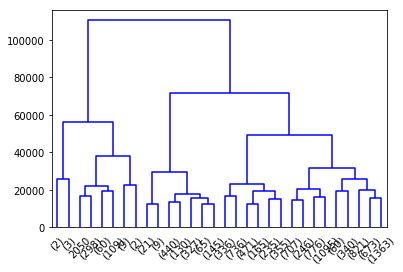

In [22]:
data_dist = pdist(Y, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

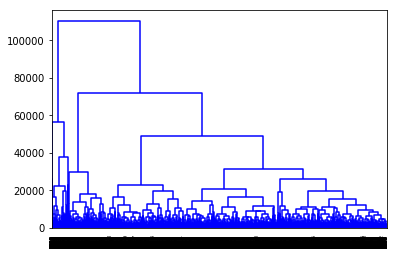

In [23]:
res = dendrogram(data_link, color_threshold=1.0)

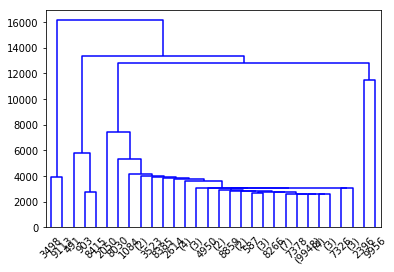

In [24]:
data_dist = pdist(Y, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')

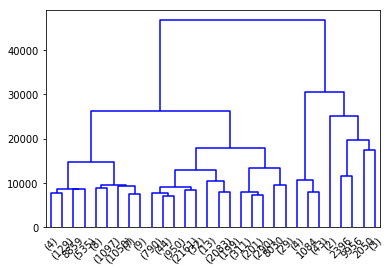

In [25]:
data_dist = pdist(Y, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp')